In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/class_5_data.csv')


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df[df['Customer_ID'] == 1]

,Customer_ID,Age,Gender,Campaign_Exposure,Transaction_Category,Purchase_Amount,Premium_Product
0,1,39,Male,1,Electronics,93.775039,0
1,1,39,Male,1,Home Essentials,65.573266,0
2,1,39,Male,1,Home Essentials,61.982719,0
3,1,39,Male,1,Electronics,46.487828,1
4,1,39,Male,1,Home Essentials,93.138071,0
5,1,39,Male,1,Clothing,47.597182,1
6,1,39,Male,1,Clothing,57.596415,0
7,1,39,Male,1,Clothing,48.714884,0
8,1,39,Male,1,Home Essentials,62.596692,0
9,1,39,Male,1,Electronics,94.215648,0


In [8]:
df[df['Customer_ID'] == 24]

,Customer_ID,Age,Gender,Campaign_Exposure,Transaction_Category,Purchase_Amount,Premium_Product
232,24,20,Female,0,Home Essentials,42.688348,0
233,24,20,Female,0,Clothing,55.527474,0
234,24,20,Female,0,Clothing,45.631761,0
235,24,20,Female,0,Clothing,44.330318,1
236,24,20,Female,0,Clothing,54.219326,0
237,24,20,Female,0,Electronics,35.387127,1


In [9]:
# check sample sizing
df.groupby('Campaign_Exposure')['Customer_ID'].nunique()

,Customer_ID
Campaign_Exposure,
0,500
1,500


In [10]:
df.rename(columns = {'Age':'Customer_Age_Months'}, inplace=True)

<Axes: ylabel='Purchase_Amount'>

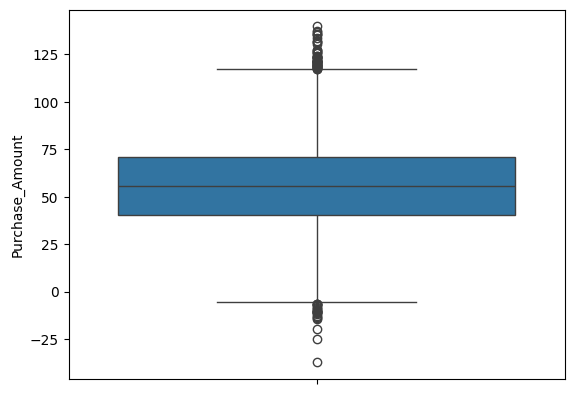

In [11]:
import seaborn as sns
sns.boxplot(df['Purchase_Amount'])

<Axes: xlabel='Purchase_Amount', ylabel='Count'>

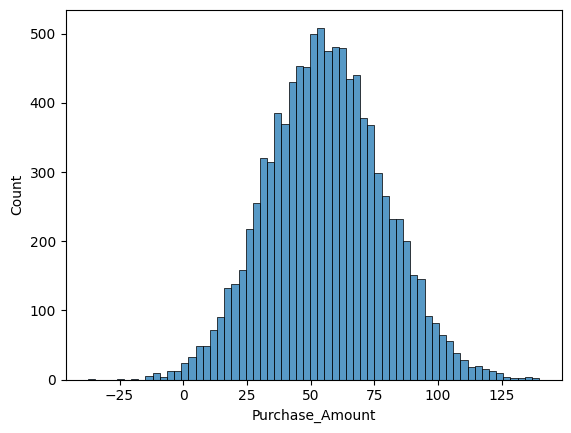

In [12]:
sns.histplot(df['Purchase_Amount'])

In [15]:
cust_level = df.groupby('Customer_ID')[['Customer_Age_Months','Gender','Campaign_Exposure','Transaction_Category','Purchase_Amount','Premium_Product']]\
.agg({'Customer_Age_Months':'max','Gender':'max','Campaign_Exposure':'max','Purchase_Amount':'mean','Premium_Product':'mean'})

In [17]:
campaign_cx = cust_level[cust_level['Campaign_Exposure']==1]
reg_cx = cust_level[cust_level['Campaign_Exposure']==0]

<Axes: xlabel='Purchase_Amount', ylabel='Count'>

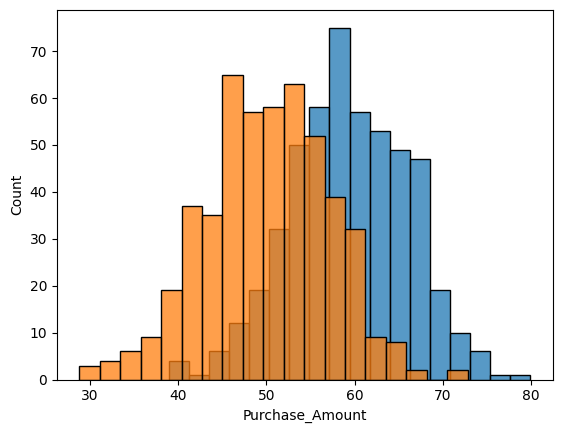

In [18]:
sns.histplot(campaign_cx['Purchase_Amount'])
sns.histplot(reg_cx['Purchase_Amount'])

In [20]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [21]:
t_stat, p_value = ttest_ind(campaign_cx['Purchase_Amount'], reg_cx['Purchase_Amount'], alternative='greater')

In [22]:
print(p_value)

5.88452655760787e-85


In [23]:
u_stat, p_value = mannwhitneyu(campaign_cx['Purchase_Amount'], reg_cx['Purchase_Amount'], alternative='greater')

In [25]:
print(p_value)

3.079899434012262e-74
